<a href="https://colab.research.google.com/github/arvishcdoshi/LangChain-LangGraph/blob/main/LangChain_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dotenv langchain[groq]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 6.1 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"] = userdata.get('groqApiKey')

In [7]:
from langchain.chat_models import init_chat_model

model = init_chat_model("qwen/qwen3-32b", model_provider="groq")

In [8]:
response = model.invoke("Explain me about neural networks")
response.content

"<think>\nOkay, so I need to explain neural networks. Let me start by recalling what I know. Neural networks are inspired by the human brain, right? They consist of layers of nodes, called neurons. Each neuron takes inputs, processes them, and produces an output. \n\nFirst, maybe I should break down the basic structure. There's the input layer, which is where the data starts. Then there are hidden layers, which process the data in steps. Finally, there's the output layer, which gives the result. Each neuron in a layer is connected to neurons in the next layer, and these connections have weights—like adjustable parameters that determine the strength of the connection. \n\nWait, how does the processing work? Each neuron sums up the weighted inputs and applies an activation function. Activation functions introduce non-linearity, allowing the network to model complex patterns. Common ones include ReLU, sigmoid, and tanh. Oh, right, without activation functions, the network would just be a 

In [9]:
response = model.invoke("Who is the prime minister of India")
response.content

"<think>\nOkay, the user is asking for the current Prime Minister of India. Let me recall the information I have. As of my last update in October 2023, the Prime Minister of India is Narendra Modi. He has been serving in this role since May 2014, and he's from the Bharatiya Janata Party (BJP). I should confirm if there have been any changes since then. I don't think there have been any recent changes, so he's still the current PM.\n\nI need to make sure I present the answer clearly. The user might be looking for a straightforward answer without any extra details, but maybe they also want some context. I should mention his party, the years in office, and perhaps his significance. Also, considering the user might not know the political structure, it's good to add that he was re-elected in 2019 and 2024. Wait, the 2024 election hasn't happened yet as of October 2023. The next general election is tentatively scheduled for 2024, but he's still the current PM until then. So I should avoid me

In [10]:
from langchain_core.messages import HumanMessage, SystemMessage


model.invoke("Hello")

model.invoke([{"role": "user", "content": "Hello"}])

model.invoke([HumanMessage("Hello")])

AIMessage(content='<think>\nOkay, the user just said "Hello". That\'s a standard greeting. I should respond in a friendly and welcoming manner. Let me make sure to acknowledge their greeting and offer assistance. Maybe something like, "Hello! How can I assist you today?" That should cover it. I need to keep it simple and open-ended to encourage them to ask their question or share what they need help with.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 9, 'total_tokens': 103, 'completion_time': 0.159068562, 'completion_tokens_details': None, 'prompt_time': 0.000529421, 'prompt_tokens_details': None, 'queue_time': 0.021526437, 'total_time': 0.159597983}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_d58dbe76cd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b13b6-a243-7f01-b7f2-b197dafdddcb-0', usage_metadata

In [11]:
model.invoke("Suggest me name of a place in one word to travel in India")

AIMessage(content='<think>\nOkay, the user wants a one-word name of a place in India to travel. Let me start by brainstorming some popular locations. There\'s Kerala, known for its backwaters and beaches. Then there\'s Rajasthan, famous for forts and deserts. Maybe Goa for its beaches and nightlife. But wait, the user might prefer a more unique or less obvious suggestion.\n\nHmm, I should consider different regions. The north has places like Ladakh, which is stunning with mountains and lakes. In the south, there\'s Tamil Nadu with places like Thanjavur. But maybe a single word that\'s a city or town. Udaipur comes to mind, the "City of Lakes." Or Jaipur, the Pink City. \n\nWait, the user might want a word that\'s a bit more poetic or has a specific appeal. Like Rishikesh for spiritual seekers, or Leh in Ladakh. But I need to make sure it\'s a single word. Let me verify. Rishikesh is two words. Leh is one. How about Haridwar? That\'s one word. Or maybe a temple town like Varanasi? But V

In [12]:
from langchain_core.prompts import ChatPromptTemplate
travel_template = "Suggest me name of a place in one word to travel in {country}"
prompt_template = ChatPromptTemplate.from_messages([("system", travel_template), ("user", "{country}")])

In [13]:
prompt = prompt_template.invoke({"country": "India"})

In [14]:
model.invoke(prompt)

AIMessage(content='<think>\nOkay, the user wants a one-word name of a place to travel in India. Let me think about popular destinations. There are so many options, but I need to narrow it down to one. Let\'s see... Heritage sites, beaches, hill stations, spiritual places?\n\nFirst, considering heritage, places like Jaipur (Pink City) or Agra (for the Taj Mahal). But maybe too obvious. Spiritual places like Varanasi or Amritsar. Natural beauty could be places like Darjeeling or Kerala. Beaches like Goa or Kerala again.\n\nWait, the user might appreciate a place that\'s unique and has multiple attractions. Maybe a city known for more than one thing. Leh in Ladakh is beautiful but maybe a bit remote. Udaipur is a popular tourist spot with lakes and palaces. Rishikesh is a spiritual hub and has adventure activities.\n\nAlternatively, places like Kerala are a state, but the user asked for a place. Maybe a specific city or town. Let me think of one-word names. Jaipur, Udaipur, Varanasi, Goa,

In [15]:
prompt_template = ChatPromptTemplate.from_template("Suggest me name of a place in one word to travel in {country} in month {month}")
prompt = prompt_template.invoke({"country": "India", "month": "December"})
print(prompt)

messages=[HumanMessage(content='Suggest me name of a place in one word to travel in India in month December', additional_kwargs={}, response_metadata={})]


In [16]:
response = model.invoke(prompt)
response.content

'<think>\nOkay, the user wants a single-word name of a place in India to visit in December. Let me think about the best options.\n\nDecember in India is winter, so it\'s cold in the north and pleasant in the south. Popular northern destinations are places like Shimla, Manali, or Gulmarg for skiing. But the user asked for one word. Maybe "Shimla" is a good choice. It\'s a hill station, famous, and a single word. \n\nAlternatively, "Udaipur" is in Rajasthan and has a winter season, but it might be a bit hot compared to hill stations. "Jaipur" is another option but not as winter-specific. In the south, "Munnar" in Kerala is a hill station, but December is the end of the monsoon there, so maybe not ideal. "Hampi" is a historical site, but again, it\'s warm in December there. \n\nWait, "Shimla" is a hill station, part of Himachal Pradesh, and December is perfect for it with snowfall sometimes. It\'s a single word, well-known, and fits the season. Another thought: "Leh" is in Ladakh, which i

# Chaining

In [17]:
from langchain_core.output_parsers import StrOutputParser

travel_destination_chain = prompt_template | model | StrOutputParser()

In [18]:
travel_destination_chain.invoke({"country": "India", "month": "December"})

'<think>\nOkay, the user wants a single-word place in India to travel in December. Let me start by thinking about the best times to visit different regions. December is winter in North India, so places like Rajasthan might be great for their festivals and pleasant weather. Jaipur comes to mind with its festivals and forts.\n\nThen there\'s the South, like Kerala, which has the backwaters and maybe the Nehru Trophy Boat Race in February, but December is still good. But the user wants a one-word name. Kerala is a state, but maybe a specific town? Cochin? But maybe the state name is better.\n\nHimachal Pradesh has snow, but December is the start of winter. Manali? But again, the state name might be better. Then there\'s Goa, which has a nice beach climate in December. But Goa is a state, but the user might be okay with that. Wait, the user said "one word," so maybe a city? Like Udaipur? It\'s in Rajasthan, has festivals in December. Or maybe Kerala is a good option because of the backwate

In [19]:
travel_itinerary_prompt = ChatPromptTemplate.from_template("Give me 3 days itinerary for the place {destination}")

In [20]:
composed_chain = {"destination" : travel_destination_chain} | travel_itinerary_prompt | model | StrOutputParser()

In [21]:
composed_chain.invoke({"country": "India", "month": "June"})

"<think>\nOkay, the user asked for a 3-day itinerary for Shimla. Let me start by recalling the key attractions there. Shimla is a hill station in Himachal Pradesh, known for its colonial architecture, cool climate, and scenic views. First, I should outline the main spots: places like the Ridge, Mall Road, Jakhoo Temple, and Kufri. Also, nearby attractions like Kala Patthar or the British-era architecture.\n\nFor Day 1, I'll focus on the central areas. Morning at Ridge and Sungei Mani, check. Then explore Mall Road in the afternoon for shopping and food. Evening could be a view point like the Clock Tower or the Christ Church. Maybe include a visit to the Summerhill Club for the sunset. Need to make sure the timing is realistic, like leaving enough time between locations.\n\nDay 2 should include a day trip. Kufri is about 18 km away, so an early start. Visit the Kufri Hill, Toy Train, and maybe a cable car. Afternoon could head to the Tibetan Market or the Nehru Institute of Mountaineeri

# LangGraph

In [22]:
!pip install langgraph

In [30]:
from langgraph.graph import StateGraph

In [32]:
from typing import TypedDict

# Define the state schema for your graph
class GraphState(TypedDict):
  x: int
  y: int
  func1_output: int
  func2_output: int

def func1_node(state: GraphState) -> dict:
  # Assuming 'x' and 'y' are part of the initial input to the graph
  x = state.get("x", 0)
  y = state.get("y", 0)
  result = x + y
  return {"func1_output": result}

def func2_node(state: GraphState) -> dict:
  input_for_func2 = state.get("func1_output", 0)
  result = 2 * input_for_func2
  return {"func2_output": result}

In [33]:
workflow = StateGraph(GraphState) # Pass the state schema here

workflow.add_node("node_1", func1_node)
workflow.add_node("node_2", func2_node)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [34]:
app.invoke({"x": 10, "y":5})

{'x': 10, 'y': 5, 'func1_output': 15, 'func2_output': 30}

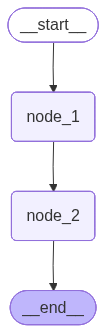

In [35]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))